# Avacado Project

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loaded the dataset from my computer

In [2]:
df=pd.read_csv(r"C:\Users\benem\Desktop\ML MODELS\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


we have a lot of rows in our dataframe around 18249 and 14 columns

We have to perform classfication as well as regression on this project.

for our classification model our target variable will be region since it has categorical data

for our regression model our target varaibel will be average price since it has continuous data

In [3]:
columns=df.columns
columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Some of the relevant columns are Data,Average Price,type,year,region,total Volume,4046,4225,4770 as given in the question

as the small bags,large bags ,Xlargebags are not relevant for either the prediction of the average price, or the prediction of the region from where it is. We will also drop the unnamed column as i feel it does not contribute anything to our dataset

To make our work easier let us drop the irrelevant columns

In [4]:
df=df.drop(['Small Bags','Large Bags','XLarge Bags','Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico


we can see the top 5 and last 5 values of our dataframe

now we can proceed with this dataframe

# Checking Null Values in our DataFrame

In [5]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
type            0
year            0
region          0
dtype: int64

Luckily we dont have any Null Values

# DataFrame Description

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,2018.000000


We have a few outliers present which can be observe from the differnce between the three quartiles(25%,50%and 75%) and the max value

From the count value we can confirm that no null values are present

The describe function only describes int or float columns

# Checking The DataTypes of our columns

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
type             object
year              int64
region           object
dtype: object

we see that 3 columns namely Date,Type,Region are object type which we will have to convert to int as our machine learning model cannot take object datatype values

# Checking Unique Values

In [8]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
type                2
year                4
region             54
dtype: int64

We can see that type ,year and region upto some extent has categorical data present in them

# EDA

Another thing that i observed is that we have a date column which contains the year,day and month and there is another column for year. Therfore for convenience i will splt the date column and then drop the year column to avoid duplication of the year column

In [9]:
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018,WestTexNewMexico,2018,02,04
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018,WestTexNewMexico,2018,01,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018,WestTexNewMexico,2018,01,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018,WestTexNewMexico,2018,01,14


dropping the year and date column now

In [10]:
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,WestTexNewMexico,2018,01,14


# Visualization

In [11]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'type', 'region', 'Year', 'Month', 'Day'],
      dtype='object')

StripPlot for continuous Data With target as Average Price

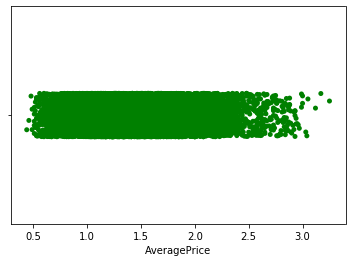

In [12]:
sns.stripplot(df['AveragePrice'], color='green')

we see that the average price data points are unifrom till 2.5, we see some outliers are present

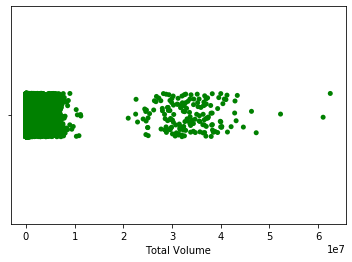

In [13]:
sns.stripplot(df['Total Volume'],color='green')

The total volume data points are uniform till around 0.8 and are scatttered in the range 2.3 to 6, few outliers are present

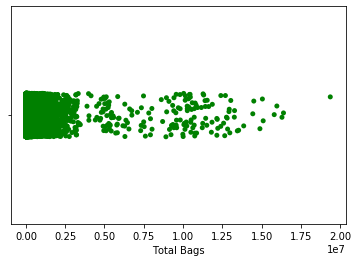

In [14]:
sns.stripplot(df['Total Bags'],color='green')

The Total bags data points are uniform from 0 to 0.25 and scattered from 0.50 to 1.50 , we also see the prescence of an oulier

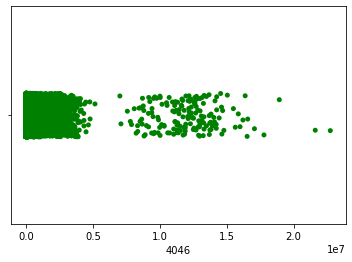

In [15]:
sns.stripplot(df['4046'],color='green')

the 4046 data points are uniform from 0 to 0.4 and are scattered from 0.7 to 1.8, few outliers are present

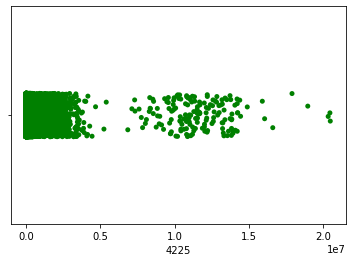

In [16]:
sns.stripplot(df['4225'],color='green')

the 4225 data points are uniform from 0 to 0.4 and scattered from 0.6 to 1.4, we can detect the prescence of some outliers

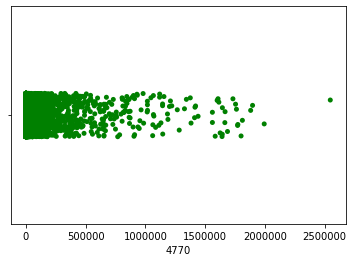

In [17]:
sns.stripplot(df['4770'],color='green')

the 4770 data points are unifrom from 0 to 500000 and scattered from 500000 onwards, we see that there is an outlier

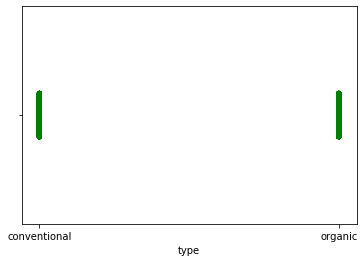

In [18]:
sns.stripplot(df['type'],color='green')

the type data points are uniform for coventional and organic data type

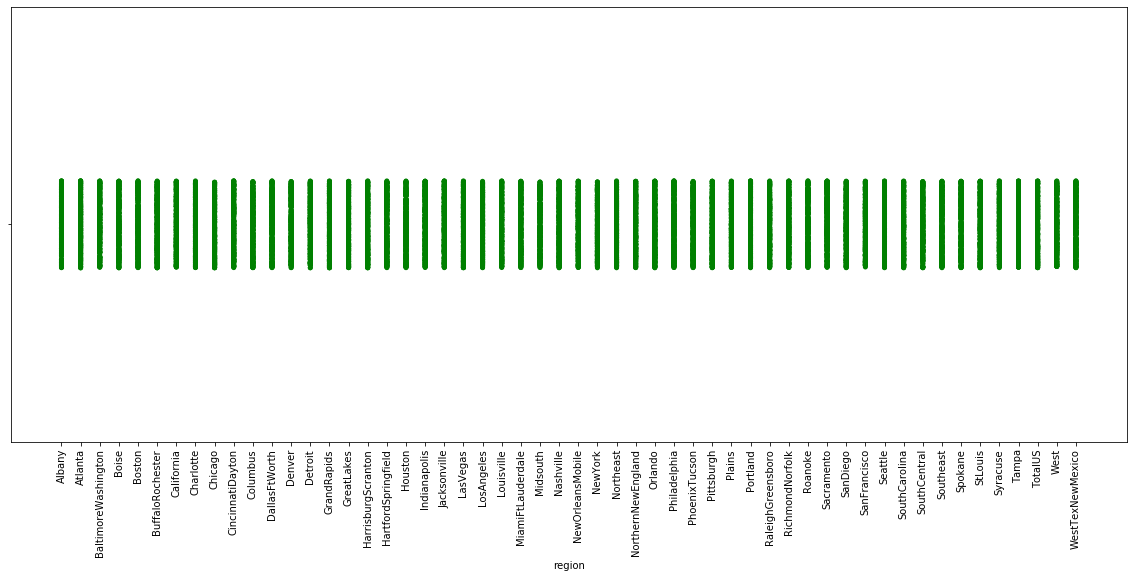

In [19]:
plt.figure(figsize=(20,8))
sns.stripplot(df['region'], data=df,color='green')
plt.xticks(rotation=90)
plt.show()

we see that the data points for different region are uniform

CountPlot

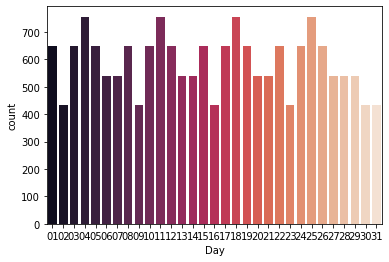

In [20]:
sns.countplot(x='Day', data=df, palette="rocket")

the day column has a pattern that repeats from day 2 to day 9 and then repeats, it increases and then decreases and then becomes constant and repeats

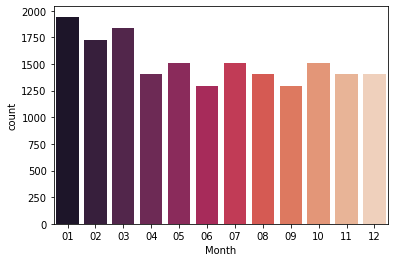

In [21]:
sns.countplot(x='Month', data=df, palette="rocket")

The month sales decreases over the year with the gighest in the first month

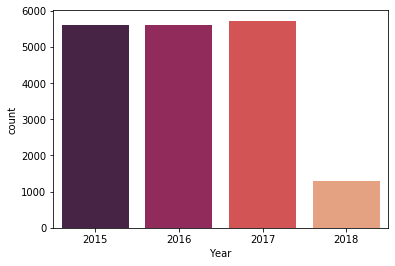

In [22]:
sns.countplot(x='Year', data=df, palette="rocket")

we see that the year sales for avacados is constant for the years 15,16,17 but is very less in 2018

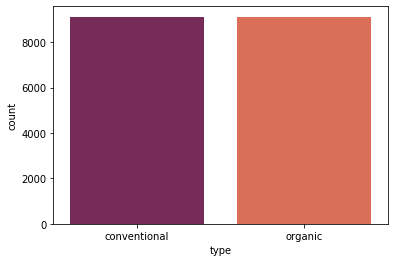

In [23]:
sns.countplot(x='type', data=df, palette="rocket")

we observe that both the types, conventional and organic are uniform or equal in ratio

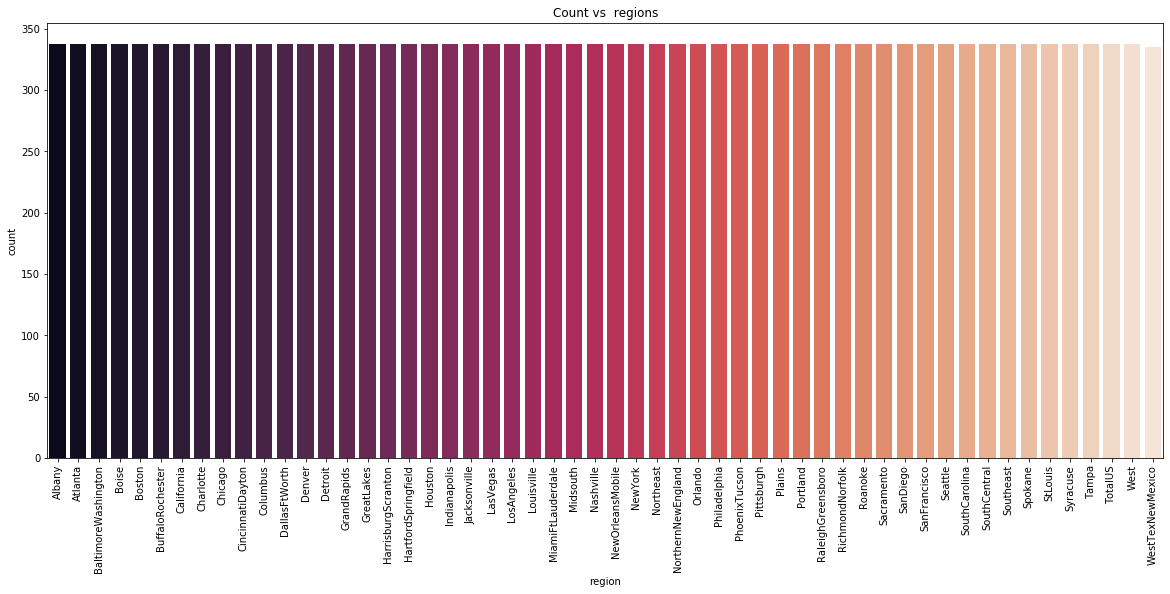

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(df['region'], data=df,palette='rocket')
plt.title('Count vs  regions')
plt.xticks(rotation=90)
plt.show()

we see that all the values of different regions are uniform. The westTexMexico column is slightly less than others

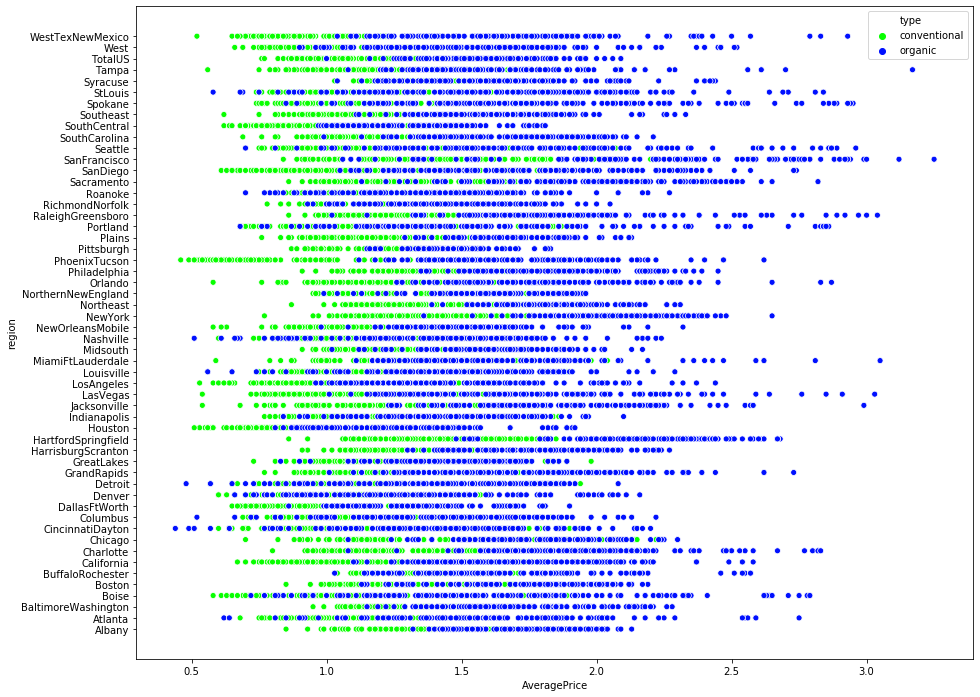

In [25]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette='hsv')
plt.show()

From the above graph we can see that the organic avacados are priced higher as compared to conventional which makes sense since they are organic

# Normal Distribution Curve

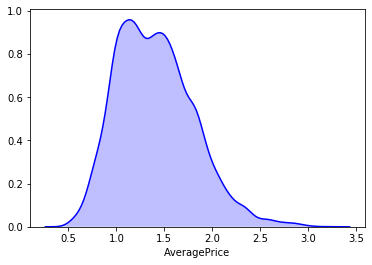

In [26]:
sns.distplot(df['AveragePrice'], hist=False, color="blue", kde_kws={"shade": True})


we see that the Average price has little skewness and is not normally distributed as the bell shape is not very clear

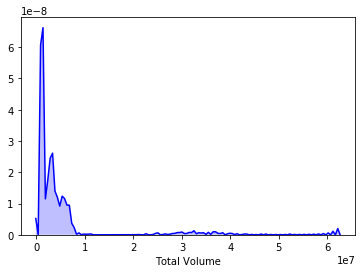

In [27]:
sns.distplot(df['Total Volume'], hist=False, color="blue", kde_kws={"shade": True})

The total volume is not normally distributed and is highly skewed

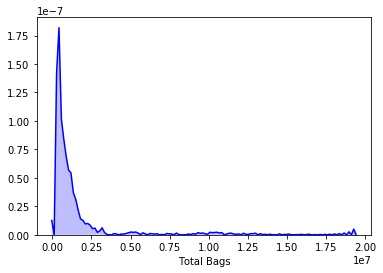

In [28]:
sns.distplot(df['Total Bags'], hist=False, color="blue", kde_kws={"shade": True})

The total bags is not normally distributed and is highly skewed

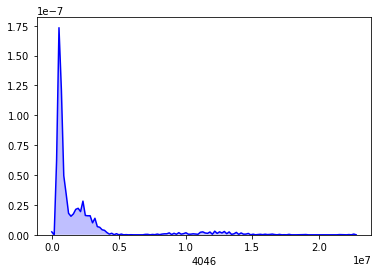

In [29]:
sns.distplot(df['4046'], hist=False, color="blue", kde_kws={"shade": True})

The 4046 column is not normally distributed and is highly right skewed

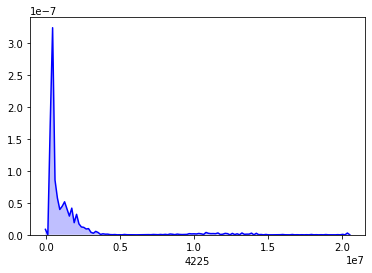

In [30]:
sns.distplot(df['4225'], hist=False, color="blue", kde_kws={"shade": True})

The 4225 column is not normally distributed and is highly right skewed

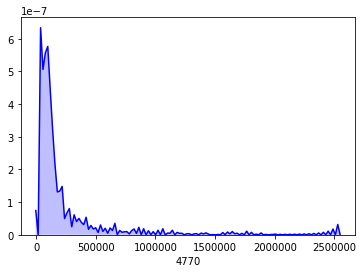

In [31]:
sns.distplot(df['4770'], hist=False, color="blue", kde_kws={"shade": True})

the 4770 is not normally distributed and is highly right skewed

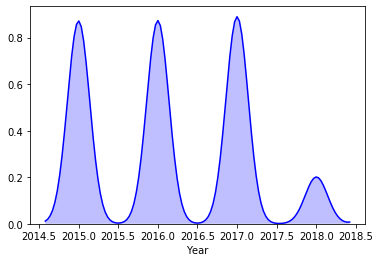

In [32]:
sns.distplot(df['Year'], hist=False, color="blue", kde_kws={"shade": True})

We see that the year column is normally distributed which can be seen from the 4 bell curves

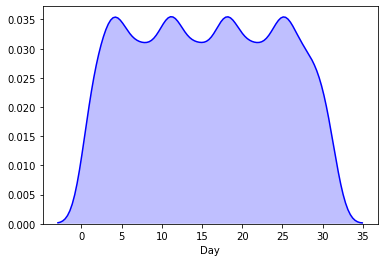

In [33]:
sns.distplot(df['Day'], hist=False, color="blue", kde_kws={"shade": True})

We see that the day column is not normally distributed and there is little skewness

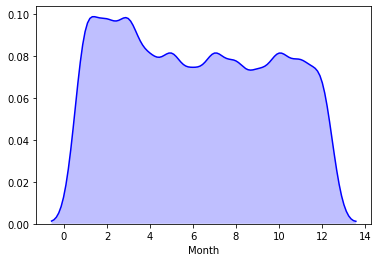

In [34]:
sns.distplot(df['Month'], hist=False, color="blue", kde_kws={"shade": True})

We observe that the month column is not normally distributed and has litle skewness present

# Encoding

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,0.0,0.0,11.0,26.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,0.0,0.0,11.0,19.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,0.0,0.0,11.0,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,0.0,0.0,11.0,5.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,0.0,0.0,10.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1.0,53.0,3.0,1.0,3.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1.0,53.0,3.0,0.0,27.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1.0,53.0,3.0,0.0,20.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1.0,53.0,3.0,0.0,13.0


We have succesfully encoded our categorical data into numerical values

# Correlation With Target Column AveragePrice

In [36]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
4225           -0.172928
region         -0.011716
Day             0.027386
Year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

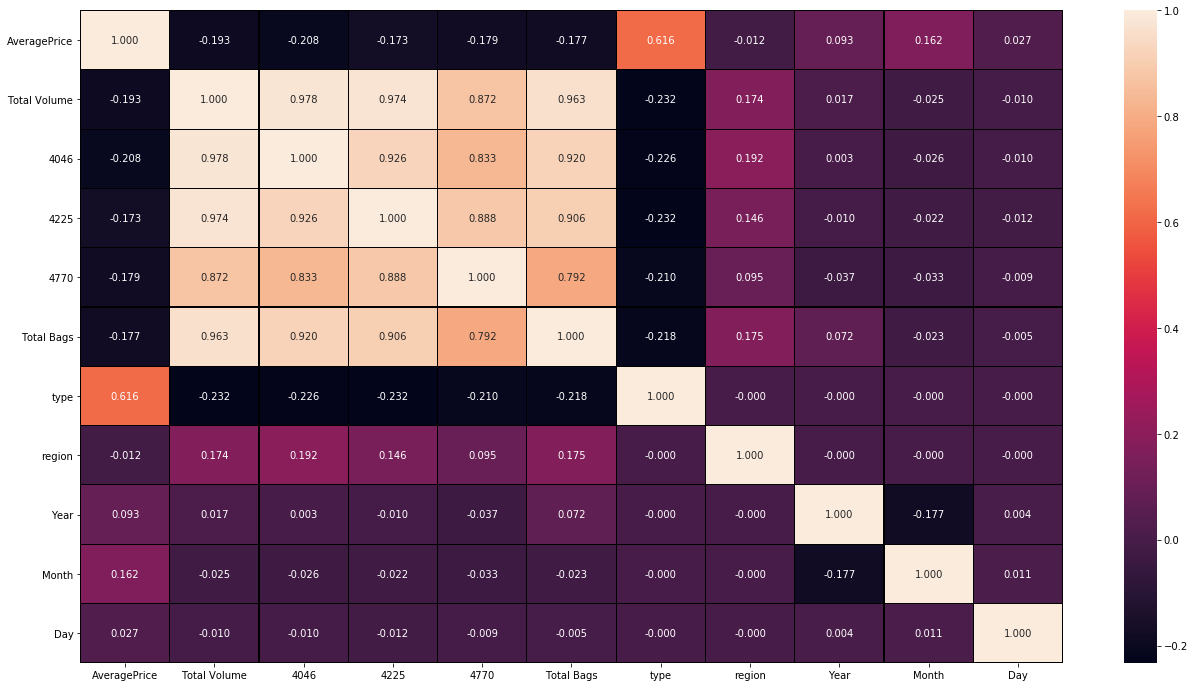

In [37]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

It is easier for us to indentify the correlation between variables with the help of a heat map. A zero correlation indicates there is no relationship between variables. The AveragePrice column is positively correlated with type and negatively correlated with 4046 column with a value of -0.21. AveragePrice is least correlated with region column with a correlation -0.01 and least positively correlated with Day column with a correlation of 0.03

There is only one positive correlation value which is high, 0.62 of type column

Let us drop the columns "4046", "4225", "4770" to avoid the problem of multicollinearity

In [38]:
df.drop(["4046", "4225", "4770"], axis=1, inplace=True)

# Correlation With Target Column Region

In [39]:
df.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
Year           -0.000055
Day            -0.000021
Total Volume    0.174176
Total Bags      0.175256
region          1.000000
Name: region, dtype: float64

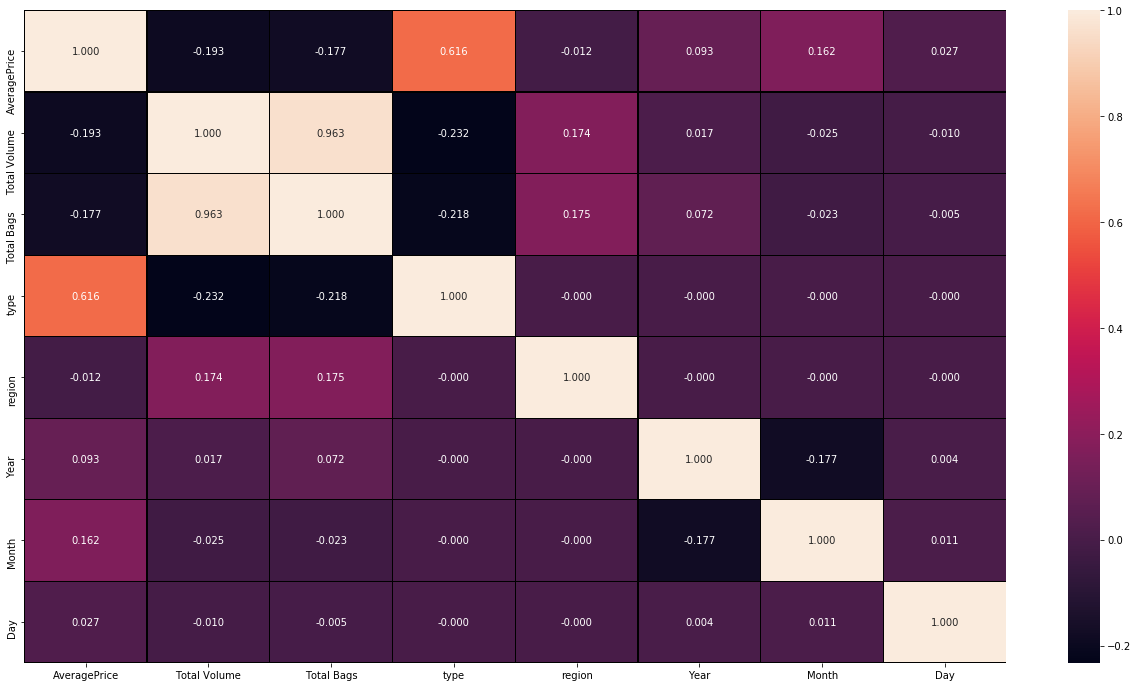

In [40]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

The Region column is negatively correlated with AveragePrice with a value of-0.01 and positively correlated with 4046 column with a value of 019. Region has no correlation with 4 columns type,Year,Month,Day
i dont see any high postive or negative correlation values which can pose a threat of multicollinearity. 

# Bar Plot for all columns along with The Target as average price

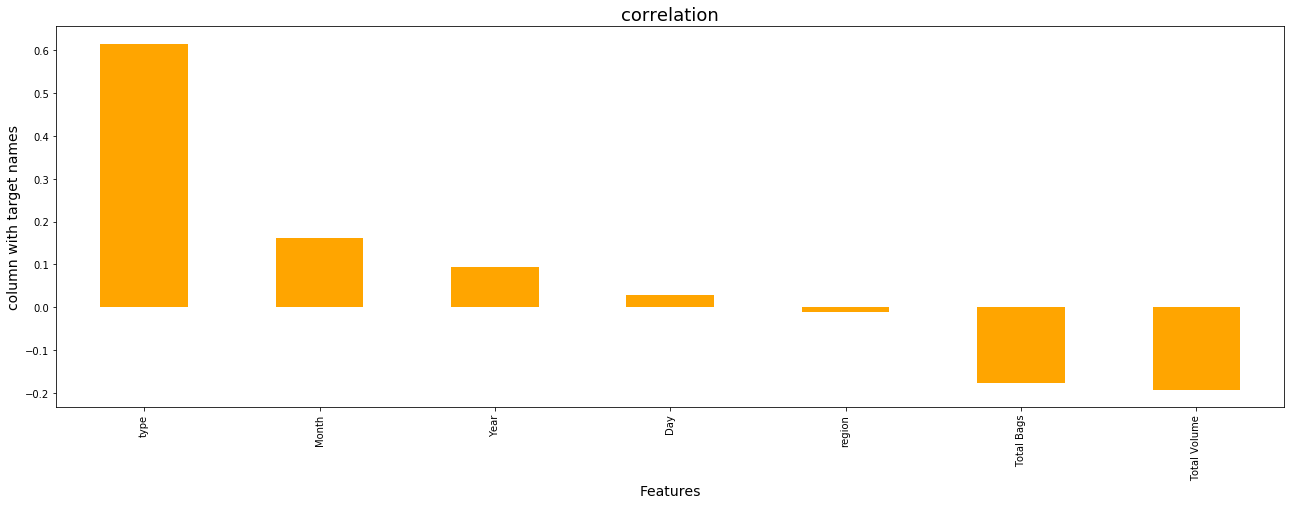

In [41]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='orange')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Bar Plot for all columns along with The Target as Region

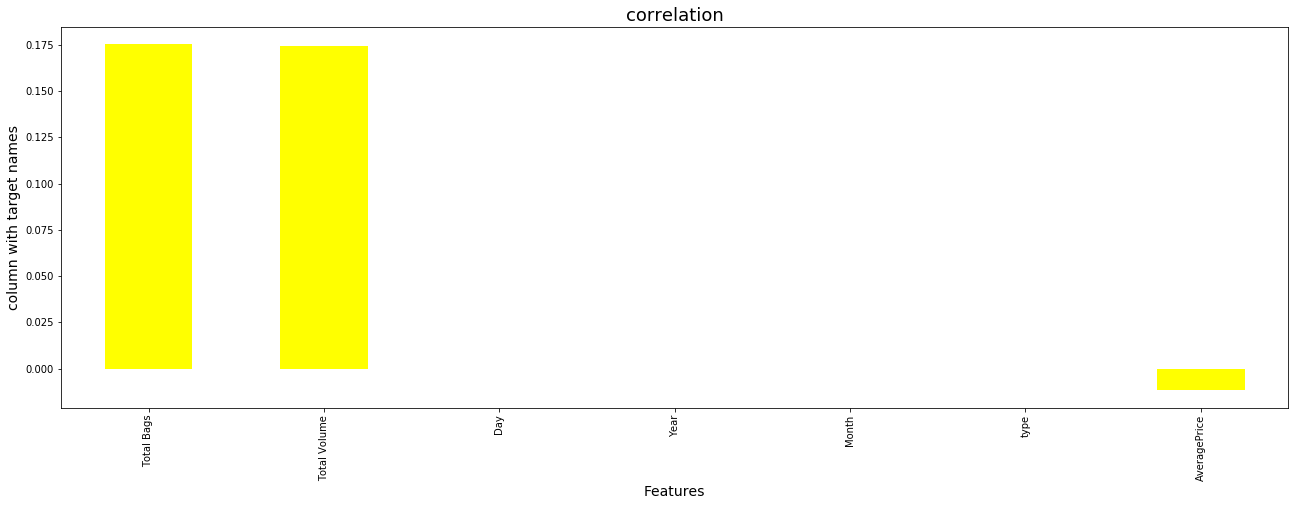

In [42]:
plt.figure(figsize=(22,7))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='yellow')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can see that most of the columns are positively correlated with region, we also see that region has no correlation with some of the columns

# CHECKING OUTLIERS

In [43]:
df.dtypes

AveragePrice    float64
Total Volume    float64
Total Bags      float64
type            float64
region          float64
Year            float64
Month           float64
Day             float64
dtype: object

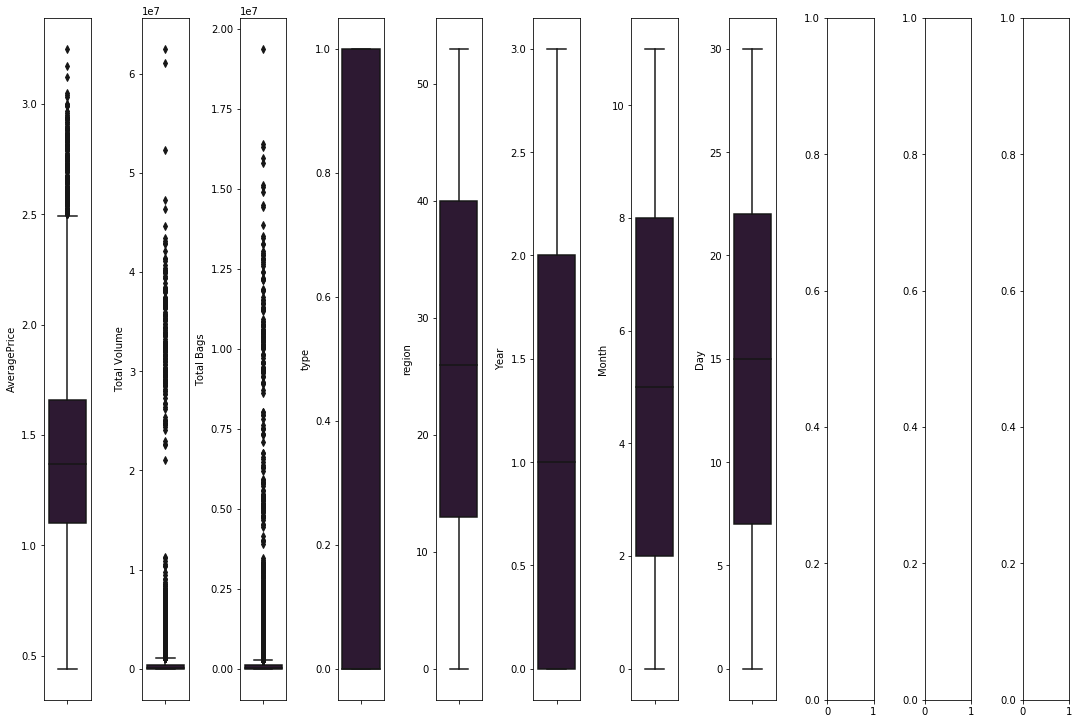

In [44]:
fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index],palette='twilight')
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.8, h_pad=5.0)
plt.show()

We can observe the pressence of outliers in the columns Total volume, Total Bags, 4046,4225,4770 and Average Price. Which can be taken care by suing the zscore method

# Removing Outliers

In [45]:
df.shape

(18249, 8)

Applying Zscore to remove outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
         2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
         2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
         2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
         2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
         2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
         2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
         2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
         2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
         2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
         2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
         2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
         5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
         5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
      

Setting the value of threshold as 3

In [47]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Day
0,1.33,64236.62,8696.87,0.0,0.0,0.0,11.0,26.0
1,1.35,54876.98,9505.56,0.0,0.0,0.0,11.0,19.0
2,0.93,118220.22,8145.35,0.0,0.0,0.0,11.0,12.0
3,1.08,78992.15,5811.16,0.0,0.0,0.0,11.0,5.0
4,1.28,51039.60,6183.95,0.0,0.0,0.0,10.0,28.0
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,3.0,1.0,3.0
18245,1.71,13888.04,9264.84,1.0,53.0,3.0,0.0,27.0
18246,1.87,13766.76,9394.11,1.0,53.0,3.0,0.0,20.0
18247,1.93,16205.22,10969.54,1.0,53.0,3.0,0.0,13.0


# Percentage Data Loss

In [48]:
Data_loss=((18249-17823)/18249)*100
print(Data_loss,'%')

2.3343744862732203 %


 The percentage data loss is very less therefore we can proceed with our new dataframe

# Handling Skweness

In [49]:
df.skew()

AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

if we take the range of skewness as (-0.5,0.5) then the columns Total Volumne ,4046,4225,4770 Total Bags are highly skewed

In [50]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

We have been successful in removing the skewness upto some extent which can be seen in our plots below

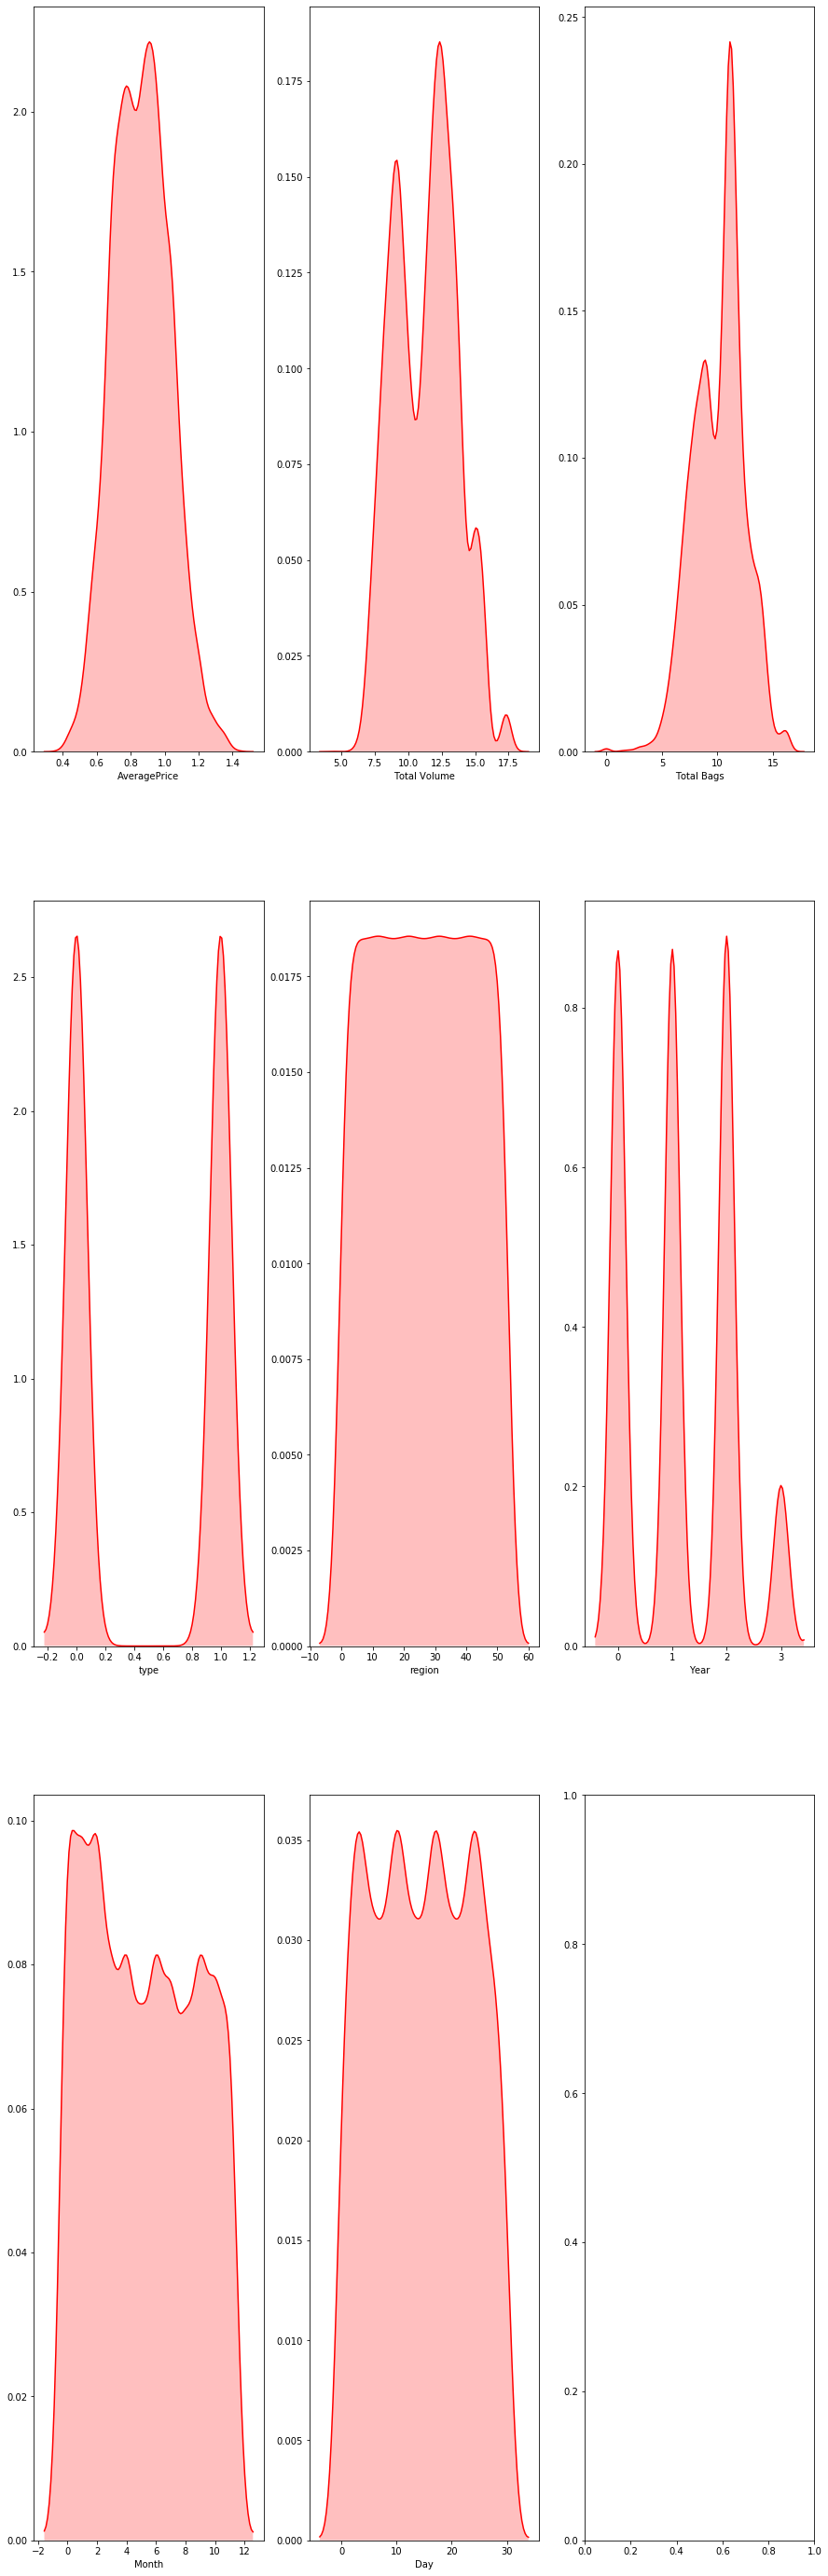

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={'shade': True})
    index += 1
plt.show()

# Separating the columns into 'features' and 'targets' as 'x' and 'y'

In [52]:
x=df_new_z.drop('AveragePrice',axis=1)
y=df_new_z['AveragePrice']
print(x.shape)
print(y.shape)

(17931, 7)
(17931,)


# Principal Component Analysis(PCA)

from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
x

# Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.39658388, -0.41313934, -1.00296016, ..., -1.21579474,
         1.65033991,  1.29178143],
       [-0.40439573, -0.41083585, -1.00296016, ..., -1.21579474,
         1.65033991,  0.49390858],
       [-0.35152745, -0.4147103 , -1.00296016, ..., -1.21579474,
         1.65033991, -0.30396428],
       ...,
       [-0.43870763, -0.41115331,  0.99704858, ...,  1.97388758,
        -1.46016839,  0.60789041],
       [-0.43667242, -0.40666583,  0.99704858, ...,  1.97388758,
        -1.46016839, -0.18998244],
       [-0.43560045, -0.40369034,  0.99704858, ...,  1.97388758,
        -1.46016839, -0.98785529]])

# Power Transform

In [54]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.59463489, -0.83419912, -1.00296016, ..., -1.26365523,
         1.59147409,  1.28889043],
       [-0.64444139, -0.81761088, -1.00296016, ..., -1.26365523,
         1.59147409,  0.49709043],
       [-0.32371167, -0.84556198, -1.00296016, ..., -1.26365523,
         1.59147409, -0.30003004],
       ...,
       [-0.87356351, -0.81989185,  0.99704858, ...,  1.82610066,
        -1.51124192,  0.61046883],
       [-0.859493  , -0.78780103,  0.99704858, ...,  1.82610066,
        -1.51124192, -0.18573988],
       [-0.85210664, -0.7667029 ,  0.99704858, ...,  1.82610066,
        -1.51124192, -0.98803107]])

# Since our target value is continuous we will be using Regression Algorithms

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Finding the best Random State

In [56]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (r2_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 46.708593407951874 at Random State 695


# Linear Regression

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=941)

lr=LinearRegression()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.28717378848593544
R2 Score is: 44.889979328720784
Cross Validation Score: 0.4382924070824768
R2 Score - Cross Validation Score is 44.451686921638306


# Support Vector Regression

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=941)

svr=SVR()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.28717378848593544
R2 Score is: 44.889979328720784
Cross Validation Score: 0.4382924070824768
R2 Score - Cross Validation Score is 44.451686921638306


# Decision Tree Regressor

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=941)

dtr=DecisionTreeRegressor()
# Training the model
dtr.fit(x_train,y_train)
    
# Predicting Y_test
pred = dtr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(dtr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.20032088570358966
R2 Score is: 73.18403424951696
Cross Validation Score: -28.088447583389453
R2 Score - Cross Validation Score is 101.27248183290641


# RandomForestRegressor

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=941)

rfr=RandomForestRegressor()
# Training the model
rfr.fit(x_train,y_train)
    
# Predicting Y_test
pred = rfr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(rfr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.13808905371717764
R2 Score is: 87.25735788448706
Cross Validation Score: 11.028640547150035
R2 Score - Cross Validation Score is 76.22871733733703


# Extreme Gradient Boosting

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=941)

xgbr=XGBRegressor()
# Training the model
xgbr.fit(x_train,y_train)
    
# Predicting Y_test
pred_xgbr = xgbr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(xgbr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 0.13808905371717764
R2 Score is: 87.25735788448706
Cross Validation Score: 38.73570943367877
R2 Score - Cross Validation Score is 48.52164845080829


I Choose Extreme Gradient boosting as my best model as the R2 score is good and the cross validation is also not bad compared to other models

# Hyperparameter tuning using Grid Search CV

the parameters have been taken after referring from the sklearn webpage

In [62]:
fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [63]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

GSCV.fit(x_train,y_train)

GSCV.best_params_

GSCV.best_score_

In [ ]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

# Linear Regression graph

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Actual Wins',fontsize=15)
plt.ylabel('Predicted Wins',fontsize=15)
plt.title('XGBA Reggressor',fontsize=20)
plt.show()

We observe that our line of best fit is covering almost majority of the data. No outliers can be observed that may decrease the accuracy

# Saving the best model

In [ ]:
import pickle
filename='Avacado_Project_E3.pkl'
pickle.dump(XGBRegressor(),open(filename,'wb'))

# Since our target variable Region has categories Therefore we will be using Classification Algorithms

# splitting our data frame into target and features as 'a' and 'b'

In [65]:
x1=df_new_z.drop('region',axis=1)
y1=df_new_z['region']
print(x.shape)
print(y.shape)

(17931, 7)
(17931,)


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [67]:
maxAccu=0
maxRS=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 3.396417708685367 at Random State 97


# Support vector classifier

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=97)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  10.561000337952011

Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       120
         1.0       0.50      0.03      0.05       116
         2.0       0.44      0.19      0.26       123
         3.0       0.00      0.00      0.00       106
         4.0       0.18      0.08      0.11       123
         5.0       0.00      0.00      0.00       119
         6.0       0.44      0.16      0.23       107
         7.0       0.00      0.00      0.00       123
         8.0       0.21      0.35      0.26        91
         9.0       0.06      0.16      0.09       106
        10.0       0.00      0.00      0.00       108
        11.0       0.21      0.21      0.21       107
        12.0       0.41      0.16      0.23       105
        13.0       0.08      0.24      0.12        99
        14.0       0.00      0.00      0.00       109
        15.0       0.24      0.06      0.10       134
        16.0       0

# Logistic Regression

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=97)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  3.396417708685367

Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       120
         1.0       0.00      0.00      0.00       116
         2.0       0.00      0.00      0.00       123
         3.0       0.00      0.00      0.00       106
         4.0       0.00      0.00      0.00       123
         5.0       0.00      0.00      0.00       119
         6.0       0.03      0.25      0.05       107
         7.0       0.00      0.00      0.00       123
         8.0       0.10      0.16      0.13        91
         9.0       0.00      0.00      0.00       106
        10.0       0.00      0.00      0.00       108
        11.0       0.00      0.00      0.00       107
        12.0       0.03      0.06      0.04       105
        13.0       0.00      0.00      0.00        99
        14.0       0.00      0.00      0.00       109
        15.0       0.00      0.00      0.00       134
        16.0       0.

# Decision Tree Classifier

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=31)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  44.626563028050015

Classification Report 
               precision    recall  f1-score   support

         0.0       0.66      0.68      0.67       115
         1.0       0.30      0.37      0.33       105
         2.0       0.59      0.56      0.57        98
         3.0       0.42      0.44      0.43       109
         4.0       0.53      0.52      0.53       120
         5.0       0.51      0.45      0.48       122
         6.0       0.64      0.55      0.59       109
         7.0       0.42      0.41      0.42       107
         8.0       0.69      0.52      0.59       128
         9.0       0.32      0.36      0.34       105
        10.0       0.27      0.27      0.27       108
        11.0       0.50      0.48      0.49       116
        12.0       0.48      0.41      0.44       116
        13.0       0.23      0.25      0.24       114
        14.0       0.39      0.41      0.40       111
        15.0       0.41      0.42      0.42       114
        16.0       0

# KNeighborsClassifier

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=31)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  24.366339979722877

Classification Report 
               precision    recall  f1-score   support

         0.0       0.36      0.52      0.43       115
         1.0       0.14      0.30      0.19       105
         2.0       0.23      0.49      0.31        98
         3.0       0.20      0.33      0.25       109
         4.0       0.27      0.38      0.31       120
         5.0       0.17      0.24      0.20       122
         6.0       0.23      0.32      0.27       109
         7.0       0.16      0.35      0.22       107
         8.0       0.38      0.47      0.42       128
         9.0       0.14      0.21      0.17       105
        10.0       0.15      0.20      0.17       108
        11.0       0.27      0.34      0.30       116
        12.0       0.31      0.32      0.31       116
        13.0       0.16      0.16      0.16       114
        14.0       0.19      0.23      0.21       111
        15.0       0.27      0.30      0.28       114
        16.0       0